The longest swap file is '1696413589_1.csv' with 9 swaps.
Average Swap Size: 4.44
Median Swap Size: 4.0
10th Percentile: 2.0
90th Percentile: 8.0
Total Swaps: 71


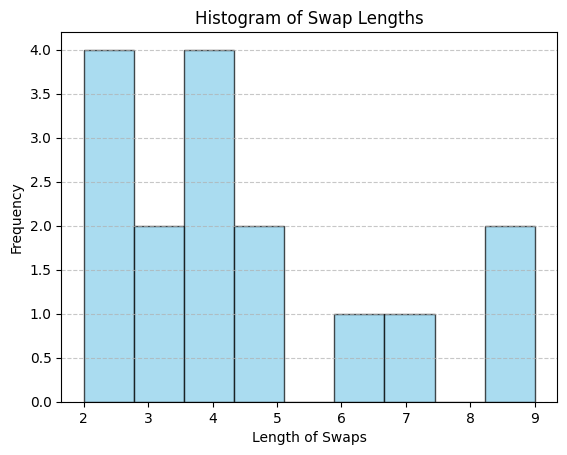

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv

def find_longest_csv(directory):
    longest_length = 0
    longest_filename = None
    csv_lengths = []  # To store lengths of all CSV files

    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.csv'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    length = len(lines) - 1
                    csv_lengths.append(length)  # Store the length for this file
                    if length > longest_length:
                        longest_length = length
                        longest_filename = filename

    return longest_length, longest_filename, csv_lengths

# Example usage:
directory_path = 'swaps'
length, filename, csv_lengths = find_longest_csv(directory_path)

if length > 0:
    print(f"The longest swap file is '{filename}' with {length} swaps.")
else:
    print("No CSV files found in the directory.")

# Calculate statistics
if csv_lengths:
    average_length = np.mean(csv_lengths)
    median_length = np.median(csv_lengths)
    percentile_10 = np.percentile(csv_lengths, 10)
    percentile_90 = np.percentile(csv_lengths, 90)
    sum_length = np.sum(csv_lengths)

    print(f"Average Swap Size: {average_length:.2f}")
    print(f"Median Swap Size: {median_length}")
    print(f"10th Percentile: {percentile_10}")
    print(f"90th Percentile: {percentile_90}")
    print(f"Total Swaps: {sum_length}")

    # Plot a histogram of CSV file lengths
    plt.hist(csv_lengths, bins=9, color='skyblue', edgecolor='black', alpha=0.7, label='CSV Lengths')
    plt.title('Histogram of Swap Lengths')
    plt.xlabel('Length of Swaps')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No CSV files found to calculate statistics or plot the histogram.")



In [2]:
def append_csvs_and_count(directory_path, output_csv_path):
    # Initialize a flag to track if the header has been written
    header_written = False
    # Initialize a counter to keep track of the number of records
    total_records = 0

    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            csv_file_path = os.path.join(directory_path, filename)

            with open(csv_file_path, mode="r", newline="") as file:
                csv_reader = csv.reader(file)
                
                # Skip the header for all but the first CSV
                if not header_written:
                    header = next(csv_reader)
                    with open(output_csv_path, mode="w", newline="") as output_file:
                        csv_writer = csv.writer(output_file)
                        csv_writer.writerow(header)
                    header_written = True
                
                # Append the data to the output CSV
                with open(output_csv_path, mode="a", newline="") as output_file:
                    csv_writer = csv.writer(output_file)
                    for row in csv_reader:
                        csv_writer.writerow(row)
                        total_records += 1

    return total_records

# Example usage:
input_directory = "./swaps"
output_csv = "combined.csv"
record_count = append_csvs_and_count(input_directory, output_csv)
print(f"Total records in the output CSV: {record_count}")


Total records in the output CSV: 1867


In [7]:
def find_duplicates_in_csv(csv_file_path, column_index):
    """
    Check for duplicates in a CSV file based on a specific column.

    Args:
    csv_file_path (str): Path to the CSV file.
    column_index (int): Index of the column to check for duplicates (0-based).

    Returns:
    list: List of duplicate values found in the specified column.
    """
    duplicate_values = set()
    unique_values = set()

    with open(csv_file_path, mode="r", newline="") as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # Skip the header row

        for row in csv_reader:
            value = row[column_index]
            if value in unique_values:
                duplicate_values.add(value)
            else:
                unique_values.add(value)

    return list(duplicate_values)

# Example usage:
csv_file = "combined.csv"
column_to_check = 0  # Change this to the index of the column you want to check for duplicates
duplicates = find_duplicates_in_csv(csv_file, column_to_check)

if duplicates:
    print(f"Duplicates found in column {column_to_check}: {', '.join(duplicates)}")
else:
    print("No duplicates found.")


IndexError: list index out of range

['email']